## Exploration_03 카메라 스티커앱 만들기

### 순서
1. 정면 이미지를 이용한 고양이 수염 붙이기
2. 고양이 수염을 볼 위치로 옮기기
2. 다른 각도의 이미지를 이용한 테스트
3. 먼 거리의 이미지를 이용한 테스트
4. 밝은 이미지를 이용한 테스트
4. 회고(총평)

### 1. 정면 이미지를 이용한 고양이 수염 붙이기

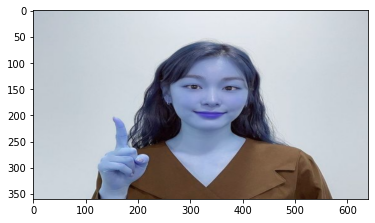

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# 이미지 불러오기
img_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(img_path)

# 이미지 resizing to 640x360
img_bgr = cv2.resize(img_bgr, (640, 360))

# 출력용 이미지 별도 보관
img_show = img_bgr.copy()      

# 사진 출력 확인
plt.imshow(img_bgr)
plt.show()

* OpenCV는 다른 시각화 모듈과는 다르게 "RGB"순서가 아닌 "BGR"순서로 색을 사용한다. 따라서 이를 "RGB순으로 바꿔줘야한다.

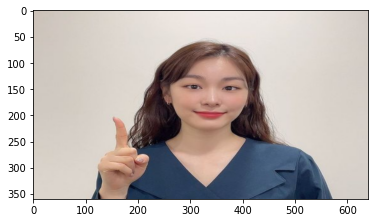

In [15]:
# BGR 을 RGB로 바꿔 재출력 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

* 색의 순서를 바꾸고 나니 정삭적으로 예쁘게 출력이 되었다.

In [5]:
import dlib # 얼굴 탐색을 위해 dlib을 import

# Face detactor를 이용해 얼굴의 bounding box를 추출
detector_hog = dlib.get_frontal_face_detector()
# 이미지 피라미드를 이용해 사각형의 크기 조절
dlib_rects = detector_hog(img_rgb, 1)

* detector_hog의 두번째 parameter인 이미지 피라미드의 수를 조절하여 얼굴을 인식하는 사각형의 크기를 조절할 수 있다. 현재 1로 지정된 것을 2로 바꾸면 좀 더 넓은 범위를 인식하게 된다.

rectangles[[(282, 110) (411, 239)]]


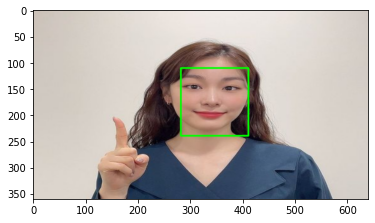

In [17]:
# 찾은 얼굴영역 좌표 출력
print(dlib_rects)   

# 여려명일 경우 각각의 얼굴 정보를 저장하기 위한 반복문
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    # cv2.rectangles의 parameter에 대한 설명은 아래 참조
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# 이미지 출력 확인
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

* rectangles 안에 각 left, top, right, bottom에 대한 정보가 잘 입력되어있고 녹색 사각형으로 그 위치를 보여주고 있다.
* cv2.rectangles(image, point1, point2, color, 선 두께(default=1), 선 종류) 순으로 들어간다.

In [18]:
import os

# Face landmark localization 을 위한 모델 가져오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

* Dlib에서는 ibug 300-W dataset으로 학습한 모델을 제공하며 이를 이용해 총 68개의 face landmark를 찾아 낼 수 있다.

In [19]:
# 각 landmark의 위치를 저장하기 위한 ist
list_landmarks = []

# 각 landmark의 위치를 찾아 list_landmkars에 튜플의 형태로 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# 총 landmark의 갯수 출력
print(len(list_landmarks[0]))

68


* 확인 결과 예상대로 68개의 landmark의 위치가 모두 저장된 것을 알 수있다.

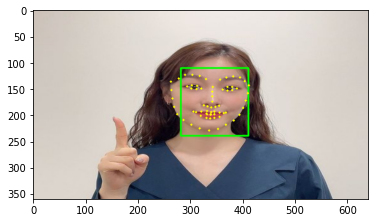

In [20]:
# 각각의 landmark 위치를 원으로 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        # cv2.circle에 대한 parameter 설명은 아래 참조
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

# 이미지 출력 확인
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

* cv2.circle을 이용해 landmark의 각 위치를 작은 원형태로 출력해 준다.
* cv2.circle(image, (x,y)좌표, radius, color, thickness, lineType) 등을 parameter로 가진다.
* 이미지가 resizing 되면서 얼굴의 형태가 바뀌었기 때문에 얼굴의 왼쪽 부분에 해당하는 landmark들이 몇개 사각형 밖으로 나간 것을 볼 수 있다. 하지만 사각형안에 눈 코입의 위치가 정상적으로 잡혀있기 때문에 딱히 문제되지는 않는다.

In [417]:
# 사진의 중앙점(코 위치)의 좌표를 x, y에 저장하기 위한 반복문
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(342, 174)
(x,y) : (342,174)
(w,h) : (130,130)


* Dlib landmark 의 위치를 보면 30번째가 정중앙 코의 위치임을 알 수 있다 따라서 index=30을 지정하여 그 위치의 x, y 값을 가져온다. 고양이 수염은 코의 위치에 둬야하기 때문에 특별히 x, y값을 수정하지 않아도 될 것 같다.

In [418]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(130, 130, 3)


* 고양이 수염이미지를 가져와서 크기를 기존에 계산된 얼굴크기(130, 130, 3)과 동일하게 맞춰준다

In [419]:
refined_x = x - w // 2 # to left
refined_y = y - h // 2  # to top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (277,109)


* 현재 중앙에 위치한 x, y 좌표를 녹색 사각형의 top-left 위치로 옮겨 주기 위해 x, y의 값에 각각 왼쪽으로 절반, 위로 절반의 값을 빼 주어 재설정한다.

In [420]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

* 스티커가 출력될 위치를 아래와 같이 설정해 준다.
* img_show[y_start : y_end, x_start : x_end], 즉 top-left에서 bottom-right 으로 최대한 얼굴 크기에 딱 맞게 설정해 준다.
* np.where 함수는 np.where(condition, a, b) 의 paramater를 가지고 조건에 맞는 a에 b를 적용하는 형태로 작동한다. 따라서 여기서는 img_sticker의 흰색 배경을 img_sticker!=0 으로 조건을 바꿔주었다.


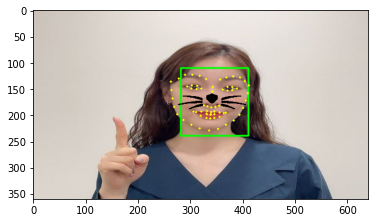

In [421]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

* 정중앙의 코 위치에 고양이 수염이 위치한 걸 확인할 수 있다.
* 수염 외에 나머지를 모두 제거한뒤 아래와 같이 최종결과를 확인한다.

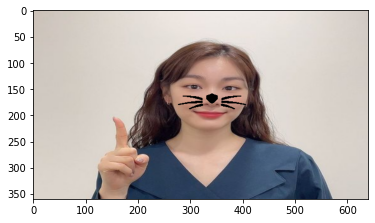

In [422]:
# 원본 사진과 스티커를 함께 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
# 결과 확인
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 2. 고양이 수염을 볼 위치로 옮기기

변경 전 좌표: (342, 174)
변경 후 좌표: (300, 171)


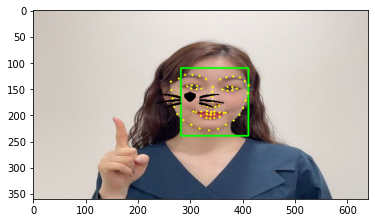

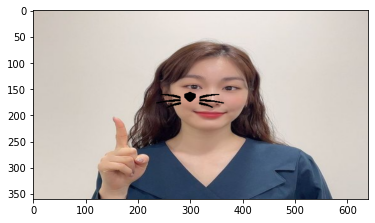

In [21]:
# 생략된 부분은 이전 예제의 코드와 동일하게 진행 됨

# ------------------------ [수정 된 부분] ---------------------------
# 사진의 중앙점(코 위치)의 좌표를 x, y에 저장하기 위한 반복문
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (f'변경 전 좌표: {landmark[30]}') # nose center index : 30
    
    # 두 직선 ((1) landmark 2 -> 30, (2) 36 -> 48 을 잇는 두 점의 교점을 구하는 공식
    x11, y11, x12, y12 = landmark[2][0], landmark[2][1], landmark[30][0], landmark[30][1]
    x21, y21, x22, y22 = landmark[36][0], landmark[36][1], landmark[48][0], landmark[48][1]
    m1 = (y12 - y11) / (x12 - x11)
    m2 = (y22 - y21) / (x22 - x21)
    
    x = round((x11 * m1 - y11 - x21 * m2 + y21) / (m1 - m2))
    y = round(m1 * (x - x11) + y11)

    w = dlib_rect.width()
    h = dlib_rect.width()
    print (f'변경 후 좌표: ({x}, {y})') # 교점의 좌표 (볼 위에 위치)
    #print ('(w,h) : (%d,%d)'%(w,h))
# -------------------------------------------------------------------
    
# 아래쪽 코드는 이전 예제와 동일한 형태로 진행 됨
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2 # to left
refined_y = y - h // 2  # to top

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 원본 사진과 스티커를 함께 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

# 결과 확인
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 설명
전체적인 코드 중에 수정된 곳은 주석으로 표시 해 둔 x, y 좌표를 설정하는 파트이다. landmark 2, 36, 30, 48을 꼭지점으로하는 사각형을 기준으로 해서 2 -> 30, 36 -> 48로 이어지는 두 직선간의 교점을 구해 새로운 x, y 좌표로 설정하였다. 같은 방식으로 오른쪽 볼 위, 또는 이마 같은 곳으로도 좌표를 설정하여 원하는 곳으로 이미지를 옮길 수 있다.

변경 전 좌표 (코): (342, 174) -> 변경 후 좌표 (볼): (300, 171)

### 3. 다른 각도의 사진을 이용한 테스트

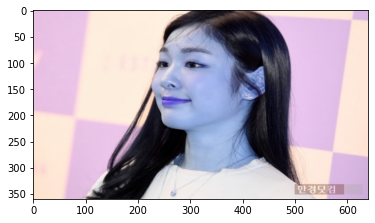

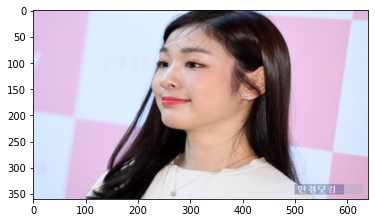

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# 이미지 불러오기
img_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/angle45.png'
img_bgr = cv2.imread(img_path)

# 이미지 resizing to 640x360
img_bgr = cv2.resize(img_bgr, (640, 360))

# 출력용 이미지 별도 보관
img_show = img_bgr.copy()      

# 사진 출력 확인
plt.imshow(img_bgr)
plt.show()

# BGR 을 RGB로 바꿔 재출력 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

* 측면으로 45도 정도 들어진 이미지를 통해 동일한 테스트를 진행해 보았다.

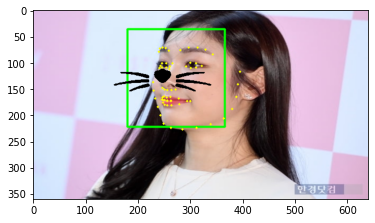

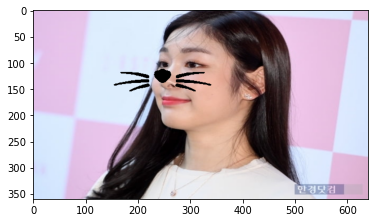

In [6]:
# 사진 외의 코드는 모두 동일하다.

import os
import dlib # 얼굴 탐색을 위해 dlib을 import

# Face detactor를 이용해 얼굴의 bounding box를 추출
detector_hog = dlib.get_frontal_face_detector()
# 이미지 피라미드를 이용해 사각형의 크기 조절
dlib_rects = detector_hog(img_rgb, 1)

# 여려명일 경우 각각의 얼굴 정보를 저장하기 위한 반복문
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    # cv2.rectangles의 parameter에 대한 설명은 아래 참조
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# 이미지 출력 확인
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
# plt.show()

# Face landmark localization 을 위한 모델 가져오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 각 landmark의 위치를 저장하기 위한 ist
list_landmarks = []

# 각 landmark의 위치를 찾아 list_landmkars에 튜플의 형태로 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# 각각의 landmark 위치를 원으로 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        # cv2.circle에 대한 parameter 설명은 아래 참조
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

# 이미지 출력 확인
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
# plt.show()

# 사진의 중앙점(코 위치)의 좌표를 x, y에 저장하기 위한 반복문
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    #print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2 # to left
refined_y = y - h // 2  # to top

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 원본 사진과 스티커를 함께 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
# 결과 확인
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 설명
중간 과정의 이미지는 모두 동일하기에 생략하였다. 결론적으로 각도가 틀어져있어도 눈 코 입이 모두 보여지는 상태라면 문제없이 인식하고 코의 위치에 맞춰 수염 이미지를 출력하는 것을 볼 수 있다. 하지만 이보다 각도가 더 틀어져 눈이 보이지 않거나 하는 사진들은 테스트를 해 봤을 때 인식을 하지 못하였다.

### 4. 거리가 있는 (얼굴 크기가 작은) 사진을 이용한 테스트

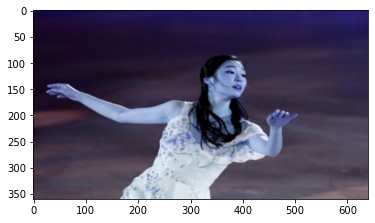

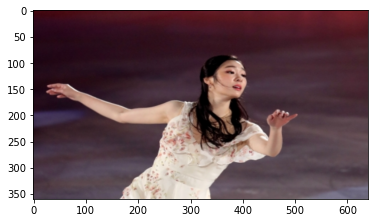

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# 이미지 불러오기
img_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/distance.png'
img_bgr = cv2.imread(img_path)

# 이미지 resizing to 640x360
img_bgr = cv2.resize(img_bgr, (640, 360))

# 출력용 이미지 별도 보관
img_show = img_bgr.copy()      

# 사진 출력 확인
plt.imshow(img_bgr)
plt.show()

# BGR 을 RGB로 바꿔 재출력 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

* 거리가 좀 멀어서 얼굴이 작게 보이는 경우에도 인식이 가능한지 테스트 해 보았다.

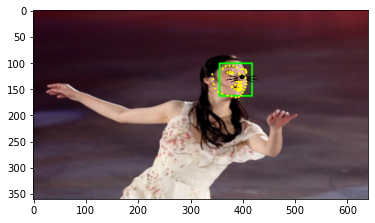

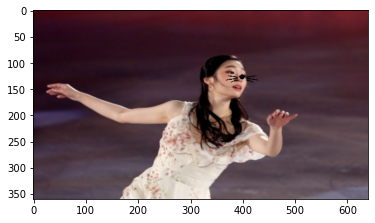

In [9]:
# 사진 외의 코드는 모두 동일하다.

import os
import dlib # 얼굴 탐색을 위해 dlib을 import

# Face detactor를 이용해 얼굴의 bounding box를 추출
detector_hog = dlib.get_frontal_face_detector()
# 이미지 피라미드를 이용해 사각형의 크기 조절
dlib_rects = detector_hog(img_rgb, 1)

# 여려명일 경우 각각의 얼굴 정보를 저장하기 위한 반복문
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    # cv2.rectangles의 parameter에 대한 설명은 아래 참조
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# 이미지 출력 확인
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
# plt.show()

# Face landmark localization 을 위한 모델 가져오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 각 landmark의 위치를 저장하기 위한 ist
list_landmarks = []

# 각 landmark의 위치를 찾아 list_landmkars에 튜플의 형태로 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# 각각의 landmark 위치를 원으로 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        # cv2.circle에 대한 parameter 설명은 아래 참조
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

# 이미지 출력 확인
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
# plt.show()

# 사진의 중앙점(코 위치)의 좌표를 x, y에 저장하기 위한 반복문
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    #print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2 # to left
refined_y = y - h // 2  # to top

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 원본 사진과 스티커를 함께 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
# 결과 확인
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 설명
거리가 좀 멀고 얼굴의 각도도 틀어진 상태여서 제대로 인식이 되지 않을 수도 있다고 생각했으나 의외로 깔끔하게 인식이 되었다. 고양이 수염도 제 위치에 위치하고 있는 것을 볼 수 있다. 거리가 조금 멀어도 눈코입이 제대로 구분 된다면 문제없이 인식이 되는 듯 하다. 하지만 이 보다 더 작은 이미지를 사용한다면 눈, 코, 입을 구분하는 landmark들의 중첩이 일어나면서 제대로 인식이 되지 않는 결과를 보일 것으로 예상된다. 

### 5. 밝은 이미지를 이용한 테스트

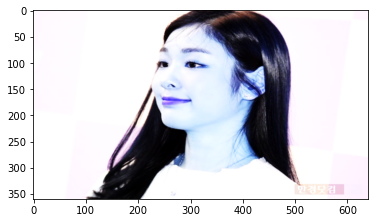

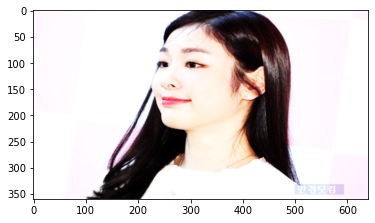

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# 이미지 불러오기
img_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/bright.png'
img_bgr = cv2.imread(img_path)

# 이미지 resizing to 640x360
img_bgr = cv2.resize(img_bgr, (640, 360))

# 출력용 이미지 별도 보관
img_show = img_bgr.copy()      

# 사진 출력 확인
plt.imshow(img_bgr)
plt.show()

# BGR 을 RGB로 바꿔 재출력 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

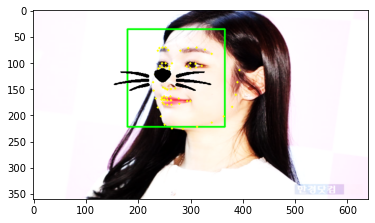

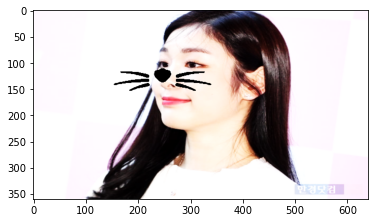

In [13]:
# 사진 외의 코드는 모두 동일하다.

import os
import dlib # 얼굴 탐색을 위해 dlib을 import

# Face detactor를 이용해 얼굴의 bounding box를 추출
detector_hog = dlib.get_frontal_face_detector()
# 이미지 피라미드를 이용해 사각형의 크기 조절
dlib_rects = detector_hog(img_rgb, 1)

# 여려명일 경우 각각의 얼굴 정보를 저장하기 위한 반복문
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    # cv2.rectangles의 parameter에 대한 설명은 아래 참조
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# 이미지 출력 확인
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
# plt.show()

# Face landmark localization 을 위한 모델 가져오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 각 landmark의 위치를 저장하기 위한 ist
list_landmarks = []

# 각 landmark의 위치를 찾아 list_landmkars에 튜플의 형태로 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# 각각의 landmark 위치를 원으로 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        # cv2.circle에 대한 parameter 설명은 아래 참조
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

# 이미지 출력 확인
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
# plt.show()

# 사진의 중앙점(코 위치)의 좌표를 x, y에 저장하기 위한 반복문
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    #print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2 # to left
refined_y = y - h // 2  # to top

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 원본 사진과 스티커를 함께 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
# 결과 확인
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 설명
위에 "3. 다른각도"를 테스트 했던 사진을 이용해 이번에는 밝기를 인위적으로 조절하여 인식 여부를 테스트 해 보았다. 결론적으로 밝기를 꽤 높혔음에도 정상적으로 인식하는 것을 확인했으며, 아예 얼굴의 일부가 보이지 않을 정도의 밝기가 아닌 이상은 충분히 인식을 하는 듯 하다.

### 6. 회고 (총평)
* 위에서 사용한 이미지 외에도 완전한 옆모습, 눈이 일부 가려진 모습 등의 여러가지 사진을 테스트 삼아 진행 해 봤는데 인식이 되지 않았다. 아마 face landmark 68개 중에 몇 개 이상이 확실히 측정되어야 작동하는 방식인것 같다.
* 밝기를 인위적으로 높힌 뒤 테스트 해본 결과에서는 정상적으로 인식하는 것을 볼 수 있었다.
* 이미지를 얼굴의 특정 위치로 옮기고자 하면 각 landmark들이 가지는 좌표를 이용해 원하는 위치의 좌표를 구할 수 있고 이런 방식으로 이미지를 옮길 수 있다.
* 여러가지 추가적인 방법들을 사용하면 얼굴의 각도에 따라 이미지도 함께 변화하는 방식이나, 작은 이미지의 경우 자체적으로 확대 시킨 뒤에 스티커 이미지를 붙이고 다시 전체 이미지를 축소시켜 원래 사이즈로 보여주는 식의 방법도 가능할 것이라 생각한다.